In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-pines-hyperspectral-dataset/indianpinearray.npy
/kaggle/input/indian-pines-hyperspectral-dataset/IPgt.npy


In [2]:

!wget "http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat"

!wget "http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat"   

--2022-01-11 17:36:26--  http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5953527 (5.7M)
Saving to: ‘Indian_pines_corrected.mat’

Indian_pines_correc 100%[===================>]   5.68M  2.10MB/s    in 2.7s    

2022-01-11 17:36:29 (2.10 MB/s) - ‘Indian_pines_corrected.mat’ saved [5953527/5953527]

--2022-01-11 17:36:30--  http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1125 (1.1K)
Saving to: ‘Indian_pines_gt.mat’

Indian_pines_gt.mat 100%[===================>]   1.10K  --.-KB/s    in 0s      

2022-01-11 17:36:30 (161 MB/s) - ‘Indian_pines_gt.mat’ saved [1125/1125]



In [3]:
!ls

Indian_pines_corrected.mat  Indian_pines_gt.mat  __notebook_source__.ipynb


In [4]:
from scipy.io import loadmat

In [5]:
## Read the data.
dataset = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
ground_truth = loadmat('Indian_pines_gt.mat')['indian_pines_gt']

In [6]:
#The dimensions of the data.
print(f'Dataset: {dataset.shape}\nGround Truth: {ground_truth.shape}')

Dataset: (145, 145, 200)
Ground Truth: (145, 145)


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_band(dataset):
    plt.figure(figsize=(8, 6))
    band_no = np.random.randint(dataset.shape[2])
    plt.imshow(dataset[:,:, band_no], cmap='jet')
    plt.title(f'Band-{band_no}', fontsize=14)
    plt.axis('off')
    plt.colorbar()
    plt.show()

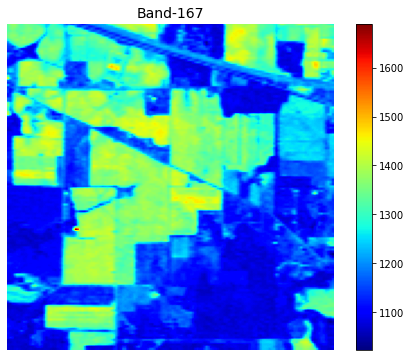

In [8]:
plot_band(dataset)


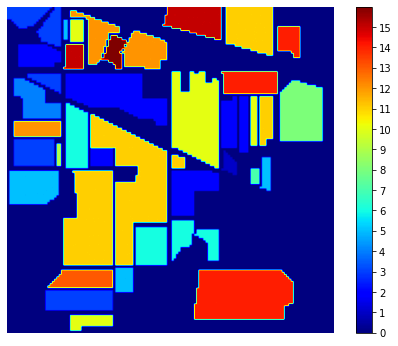

In [9]:
plt.figure(figsize=(8, 6))
plt.imshow(ground_truth, cmap='jet')
plt.axis('off')
plt.colorbar(ticks= range(0,16))
plt.show()


In [10]:
!pip install tqdm

In [11]:
from tqdm import tqdm
import pandas as pd
def extract_pixels(dataset, ground_truth):
    df = pd.DataFrame()
    for i in tqdm(range(dataset.shape[2])):
        df = pd.concat([df, pd.DataFrame(dataset[:, :, i].ravel())], axis=1)
    df = pd.concat([df, pd.DataFrame(ground_truth.ravel())], axis=1)
    df.columns = [f'band-{i}' for i in range(1, 1+dataset.shape[2])]+['class']
    return df

In [12]:
df = extract_pixels(dataset, ground_truth)


100%|██████████| 200/200 [00:00<00:00, 505.16it/s]


In [13]:
df.head()


,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [15]:
df.to_csv('Dataset.csv', index=False)

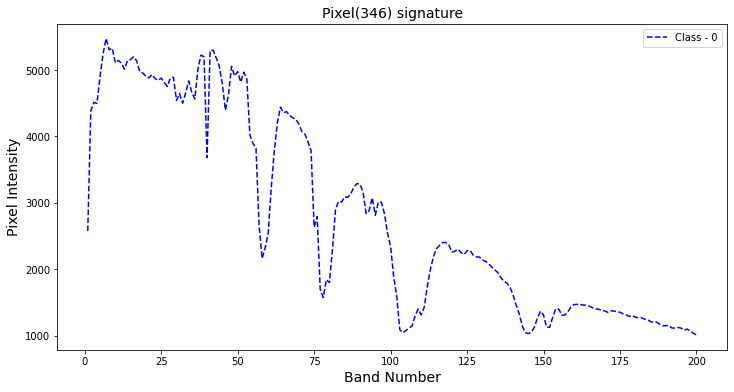

In [16]:
def plot_signature(df):
    plt.figure(figsize=(12, 6))
    pixel_no = np.random.randint(df.shape[0])
    plt.plot(range(1, 201), df.iloc[pixel_no, :-1].values.tolist(), 'b--', label= f'Class - {df.iloc[pixel_no, -1]}')
    plt.legend()
    plt.title(f'Pixel({pixel_no}) signature', fontsize=14)
    plt.xlabel('Band Number', fontsize=14)
    plt.ylabel('Pixel Intensity', fontsize=14)
    plt.show()
    
plot_signature(df)

In [17]:
df.loc[:,'class'].unique()

array([ 3,  0, 15, 11, 12,  5, 10, 14, 16,  2,  4,  8,  6,  9,  1,  7, 13],
      dtype=uint8)

In [18]:
df.loc[:, 'class'].value_counts()

0     10776
11     2455
2      1428
14     1265
10      972
3       830
6       730
12      593
5       483
8       478
15      386
4       237
13      205
16       93
1        46
7        28
9        20
Name: class, dtype: int64

NameError: name 'ticker' is not defined

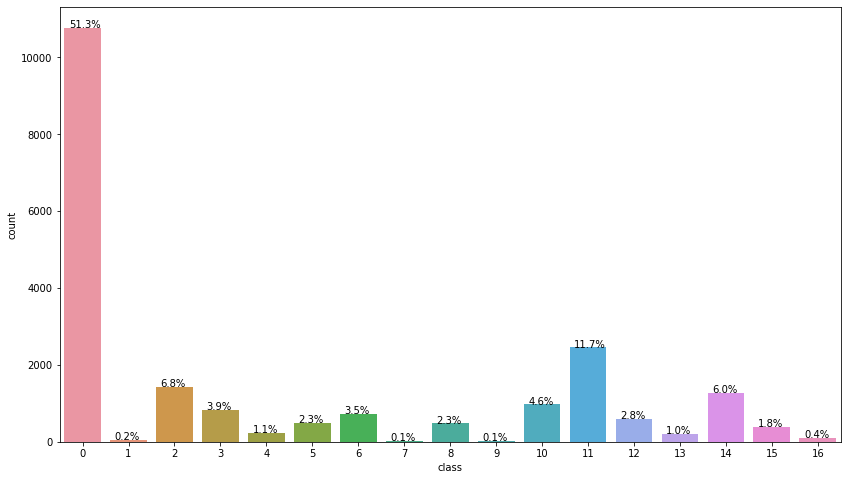

In [19]:
import seaborn as sns

plt.figure(figsize=(14, 8))

ax = sns.countplot(x='class', data=df[['class']])

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/df.shape[0]), (p.get_x()+0.1, p.get_height()+5))
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

plt.ylabel('Class count with percentage', fontsize=14)

plt.xlabel('class', fontsize=14)

plt.title('Bar Plot', fontsize=16)

plt.show()

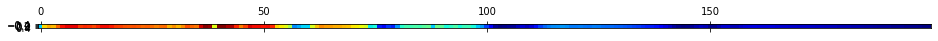

In [22]:
# Visualizing the pixel
plt.matshow(df.iloc[1, :-1].values.reshape(1,200), cmap='jet');

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_pixel(pixel, n):
    ax = plt.gca()
    im = ax.imshow(pixel.reshape(10, 20), cmap = 'jet')
    plt.title(f'pixel - {n}')
    plt.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

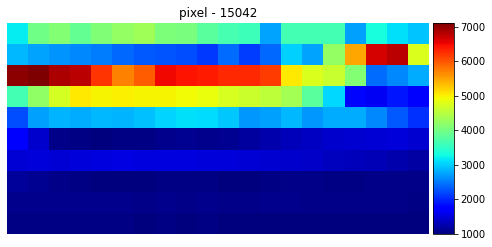

In [24]:
plt.figure(figsize=(8, 4))

rand_n = np.random.randint(df.shape[0])

plot_pixel(df.iloc[rand_n, :-1].values, rand_n)

Enter the band Number(1-200) : 10


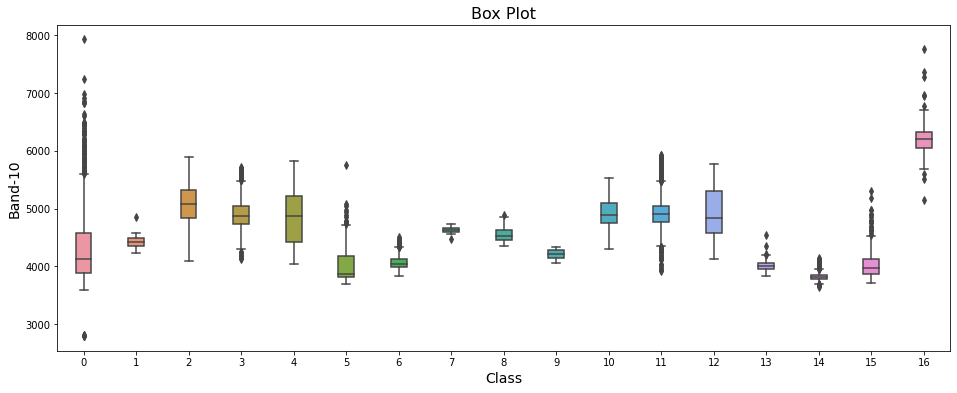

In [58]:
plt.figure(figsize=(16, 6))
n = int(input('Enter the band Number(1-200) :'))
sns.boxplot( x=df["class"], y=df[str('band-'+str(n))], width=0.3);
plt.title('Box Plot', fontsize= 16)
plt.xlabel('Class', fontsize= 14)
plt.ylabel(f'Band-{n}', fontsize= 14)
plt.show()

PCA+SVM

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('Dataset.csv')

In [21]:
df.head()

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [22]:
X = df.iloc[:, :-1].values

y = df.iloc[:, -1].values

In [23]:
X.shape,y.shape

((21025, 200), (21025,))

In [24]:
pca = PCA(n_components=150)
principalComponents = pca.fit_transform(X)
ev = pca.explained_variance_ratio_

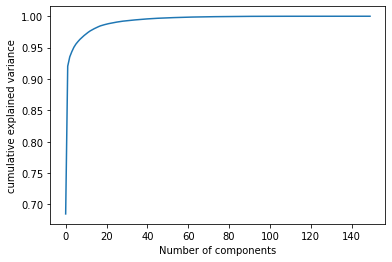

In [25]:
plt.plot(np.cumsum(ev))
plt.xlabel("Number of components")
plt.ylabel("cumulative explained variance")
plt.show()

<AxesSubplot:xlabel='Number of components'>

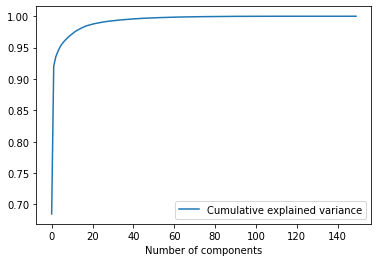

In [26]:
# Interactive plot
df3 = pd.DataFrame(ev, columns=['Cumulative explained variance']).cumsum()
df3['Number of components'] = pd.Series(list(range(150)))
df3.plot(x='Number of components', y='Cumulative explained variance')

In [27]:
X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(principalComponents, y,  range(X.shape[0]), 
                                                                                  test_size = 0.15, random_state = 11)

In [28]:
X_train.shape, X_test.shape


((17871, 150), (3154, 150))

# SVM

In [ ]:
svm = SVC(kernel='rbf', degree = 10, gamma='scale', cache_size=1024*7)
svm.fit(X_train, y_train)

In [20]:
y_pred = svm.predict(X_test)

NameError: name 'svm' is not defined

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))

NameError: name 'y_test' is not defined

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred,
    figsize=(12,12))

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z= confusion_matrix(y_test, y_pred),
                   x=[f'class-{i}' for i in np.unique(df.loc[:, 'class'].values)],
                   y=[f'class-{i}' for i in np.unique(df.loc[:, 'class'].values)],
                   hoverongaps = False))
fig.show()

In [ ]:
print('Classification report:\n',classification_report(y_test,y_pred))

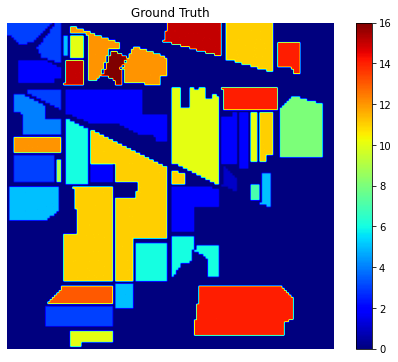

In [61]:
plt.figure(figsize=(8, 6))
plt.imshow(df.iloc[:, -1].values.reshape((145, 145)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Ground Truth')
plt.savefig('ground_truth.png')
plt.show()

In [ ]:
from tqdm import tqdm
pre = y_pred

clmap = [0]*X.shape[0]

for i in tqdm(range(len(indices_train))):
    clmap[indices_train[i]] = y[indices_train[i]]

for i in tqdm(range(len(indices_test))):
    clmap[indices_test[i]] = pre[i]

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(np.array(clmap).reshape((145, 145)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Classification Map (PCA + SVM)')
plt.savefig('Classification_map.png')
plt.show()

# Neural Network

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers, models, layers
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
X_train.shape

(17871, 150)

In [41]:

model = Sequential()

model.add(Dense(150,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())

model.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(75,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())

model.add(Dense(75,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())

model.add(Dense(17,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [42]:
batch_size = 128
epochs = 200
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)
model.fit(x=X_train,
          y=y_train,
          epochs=epochs,
          validation_data=(X_test,y_test),
          verbose=0,
         callbacks=[early_stop])


Epoch 00082: early stopping


In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 150)               22650     
_________________________________________________________________
batch_normalization_12 (Batc (None, 150)               600       
_________________________________________________________________
dropout_6 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               15100     
_________________________________________________________________
batch_normalization_13 (Batc (None, 100)               400       
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_14 (Batc (None, 100)              

In [49]:
score = model.evaluate(X_test,y_test, verbose=1)

99/99 [==============================] - 0s 3ms/step - loss: 0.5187 - accuracy: 0.8465


In [48]:
score

[0.5187037587165833, 0.846544086933136]

In [50]:
y_pred = model.predict(X_test)

In [52]:
y_pred_classes = y_pred.argmax(axis=1)

In [54]:
y_pred_classes

array([ 2,  2,  0, ..., 11,  0,  0])

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred_classes))

Accuracy:  0.8465440710209258


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

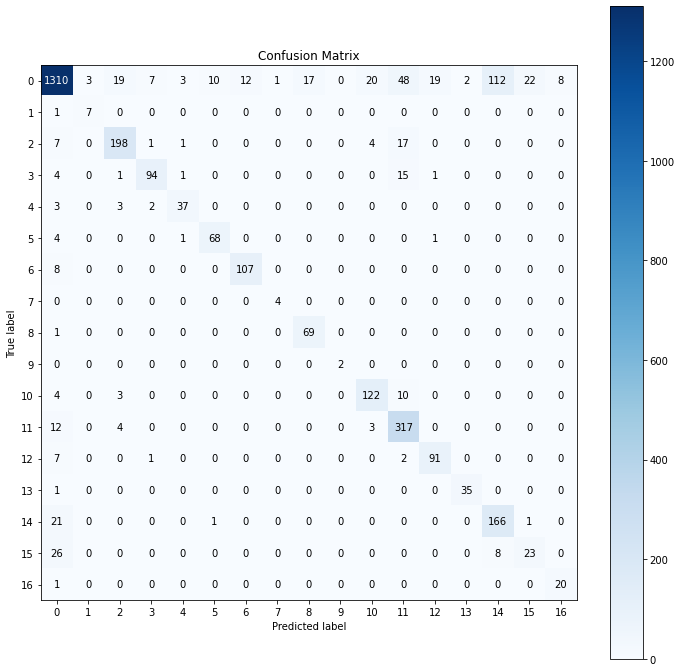

In [57]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred_classes,
    figsize=(12,12))

In [60]:
print('Classification report:\n',classification_report(y_test,y_pred_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.87      1613
           1       0.70      0.88      0.78         8
           2       0.87      0.87      0.87       228
           3       0.90      0.81      0.85       116
           4       0.86      0.82      0.84        45
           5       0.86      0.92      0.89        74
           6       0.90      0.93      0.91       115
           7       0.80      1.00      0.89         4
           8       0.80      0.99      0.88        70
           9       1.00      1.00      1.00         2
          10       0.82      0.88      0.85       139
          11       0.78      0.94      0.85       336
          12       0.81      0.90      0.85       101
          13       0.95      0.97      0.96        36
          14       0.58      0.88      0.70       189
          15       0.50      0.40      0.45        57
          16       0.71      0.95      0.82        21

  

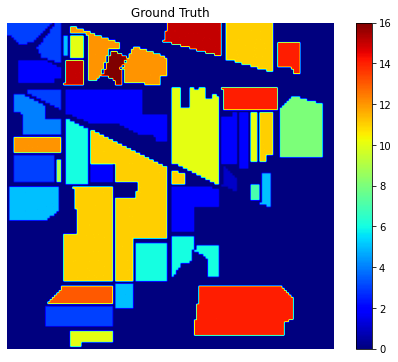

In [64]:
plt.figure(figsize=(8, 6))
plt.imshow(df.iloc[:, -1].values.reshape((145, 145)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Ground Truth')
plt.savefig('ground_truth.png')
plt.show()

In [67]:
from tqdm import tqdm
pre = y_pred_classes

clmap = [0]*X.shape[0]

for i in tqdm(range(len(indices_train))):
    clmap[indices_train[i]] = y[indices_train[i]]

for i in tqdm(range(len(indices_test))):
    clmap[indices_test[i]] = pre[i]

100%|██████████| 3154/3154 [00:00<00:00, 799518.60it/s]


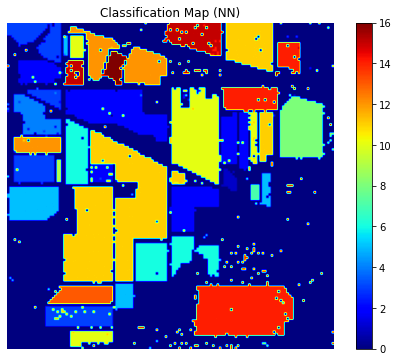

In [69]:
plt.figure(figsize=(8, 6))
plt.imshow(np.array(clmap).reshape((145, 145)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Classification Map (NN)')
plt.savefig('Classification_map.png')
plt.show()